In [30]:
import pandas as pd

In [31]:
# loading datas 
df1 = pd.read_csv('../data/benin-malanville.csv')
df2 = pd.read_csv('../data/sierraleone-bumbuna.csv')
df3 = pd.read_csv('../data/togo-dapaong_qc.csv')

# tring to see the shape of the data sets
print(f'the shape of data set benin-malanville:{df1.shape} , sierraleone-bumbuna:{df2.shape} , togo-dapaong_qc:{df3.shape}')

the shape of data set benin-malanville:(525600, 19) , sierraleone-bumbuna:(525600, 19) , togo-dapaong_qc:(525600, 19)


In [33]:
#  lets perform Exploratory Data Analysis(EDA) on each data set

df1.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [34]:
# first Summary Statistics
def summery_statistics(data , data_set_name):
    data_numeric = data.apply(pd.to_numeric , errors='coerce')
    table_data = pd.DataFrame({
        "Mean":data_numeric.mean(),
        "median":data_numeric.median(),
        "standard_deviation":data_numeric.std(),
        'Min':data_numeric.min(),
        'Max': data_numeric.max(),
        '25%': data_numeric.quantile(0.25),
        '50% (Median)': data_numeric.quantile(0.50),
        '75%': data_numeric.quantile(0.75)
    })
    # Add dataset name to the index for clarity
    table_data.index.name = f'Summary Statistics - {data_set_name}'
    return table_data


In [35]:
summery_statistics(df1,"benin-malanville")

,Mean,median,standard_deviation,Min,Max,25%,50% (Median),75%
Summary Statistics - benin-malanville,,,,,,,,
Timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHI,240.559452,1.8,331.131327,-12.9,1413.0,-2.0,1.8,483.4
DNI,167.187516,-0.1,261.710501,-7.8,952.3,-0.5,-0.1,314.2
DHI,115.358961,1.6,158.691074,-12.6,759.2,-2.1,1.6,216.3
ModA,236.589496,4.5,326.894859,0.0,1342.3,0.0,4.5,463.7
ModB,228.883576,4.3,316.536515,0.0,1342.3,0.0,4.3,447.9
Tamb,28.179683,28.0,5.924297,11.0,43.8,24.2,28.0,32.3
RH,54.487969,55.1,28.073069,2.1,100.0,28.8,55.1,80.1
WS,2.121113,1.9,1.603466,0.0,19.5,1.0,1.9,3.1


In [9]:
summery_statistics(df2,"sierraleone-bumbuna")


,Mean,median,standard_deviation,Min,Max,25%,50% (Median),75%
Summary Statistics - sierraleone-bumbuna,,,,,,,,
Timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHI,201.957515,0.3,298.495150,-19.5,1499.0,-2.8,0.3,362.4
DNI,116.376337,-0.1,218.652659,-7.8,946.0,-0.3,-0.1,107.0
DHI,113.720571,-0.1,158.946032,-17.9,892.0,-3.8,-0.1,224.7
ModA,206.643095,3.6,300.896893,0.0,1507.0,0.0,3.6,359.5
ModB,198.114691,3.4,288.889073,0.0,1473.0,0.0,3.4,345.4
Tamb,26.319394,25.3,4.398605,12.3,39.9,23.1,25.3,29.4
RH,79.448857,85.4,20.520775,9.9,100.0,68.7,85.4,96.7
WS,1.146113,0.8,1.239248,0.0,19.2,0.0,0.8,2.0


In [10]:
summery_statistics(df3,"togo-dapaong_qc")

,Mean,median,standard_deviation,Min,Max,25%,50% (Median),75%
Summary Statistics - togo-dapaong_qc,,,,,,,,
Timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHI,230.555040,2.1,322.532347,-12.7,1424.0,-2.2,2.1,442.400
DNI,151.258469,0.0,250.956962,0.0,1004.5,0.0,0.0,246.400
DHI,116.444352,2.5,156.520714,0.0,805.7,0.0,2.5,215.700
ModA,226.144375,4.4,317.346938,0.0,1380.0,0.0,4.4,422.525
ModB,219.568588,4.3,307.932510,0.0,1367.0,0.0,4.3,411.000
Tamb,27.751788,27.2,4.758023,14.9,41.4,24.2,27.2,31.100
RH,55.013160,59.3,28.778732,3.3,99.8,26.5,59.3,80.800
WS,2.368093,2.2,1.462668,0.0,16.1,1.4,2.2,3.200


In [15]:
#  second Data Quality Check
# Step 1: Identify Missing Values

def check_missing_values(data , columns,data_set_name):
    missisng_data = data[columns].isnull().sum()
    print(f'the number of missing values in data set: {data_set_name} is {missisng_data}')

# list of columns that we want to check for missing values
coulumns_to_check=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [16]:
# let's check ,issing value for three of our data sets

check_missing_values(df1,coulumns_to_check,"benin-malanville")
check_missing_values(df2,coulumns_to_check,"sierraleone-bumbuna")
check_missing_values(df3,coulumns_to_check,"togo-dapaong_qc")

the number of missing values in data set: benin-malanville is Summary Statistics - benin-malanville
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
the number of missing values in data set: sierraleone-bumbuna is Summary Statistics - sierraleone-bumbuna
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
the number of missing values in data set: togo-dapaong_qc is Summary Statistics - togo-dapaong_qc
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [17]:
# Step 2: Identify Outliers
import numpy as np
# let define a function to to outliers the first thing i use interqurtile rang(IQR)

def detect_outliers_using_IQR(data,columns,data_set_name):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        print(f'outliers in {column} for {data_set_name}:\n{outliers[[column]]}\n')


In [18]:
detect_outliers_using_IQR(df1,coulumns_to_check,'benin-malanville')
detect_outliers_using_IQR(df2,coulumns_to_check,'sierraleone-bumbuna')
detect_outliers_using_IQR(df3,coulumns_to_check,'togo-dapaong_qc')


outliers in GHI for benin-malanville:
Summary Statistics - benin-malanville     GHI
671                                    1274.0
674                                    1349.0
676                                    1334.0
849                                    1253.0
850                                    1324.0
...                                       ...
522046                                 1218.0
522067                                 1218.0
522073                                 1218.0
522074                                 1262.0
522075                                 1289.0

[145 rows x 1 columns]

outliers in DNI for benin-malanville:
Summary Statistics - benin-malanville    DNI
850                                    813.0
868                                    791.9
869                                    791.8
870                                    802.0
871                                    792.5
...                                      ...
523540                          

In [19]:
# let define another a function to to outliers the first thing i use Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_outliers_checking(data,columns,data_set_name):
    plt.figure(figsize=(12,8))
    data[columns].boxplot()
    plt.title(f"Boxplots for {data_set_name}")
    plt.xticks(rotation=45)
    plt.show()

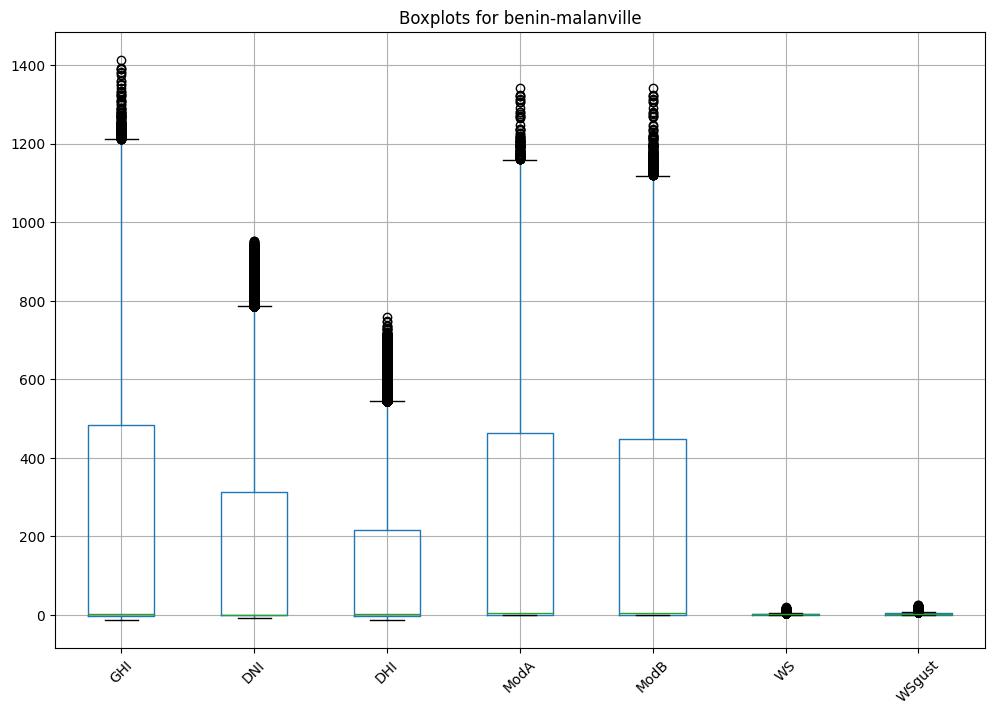

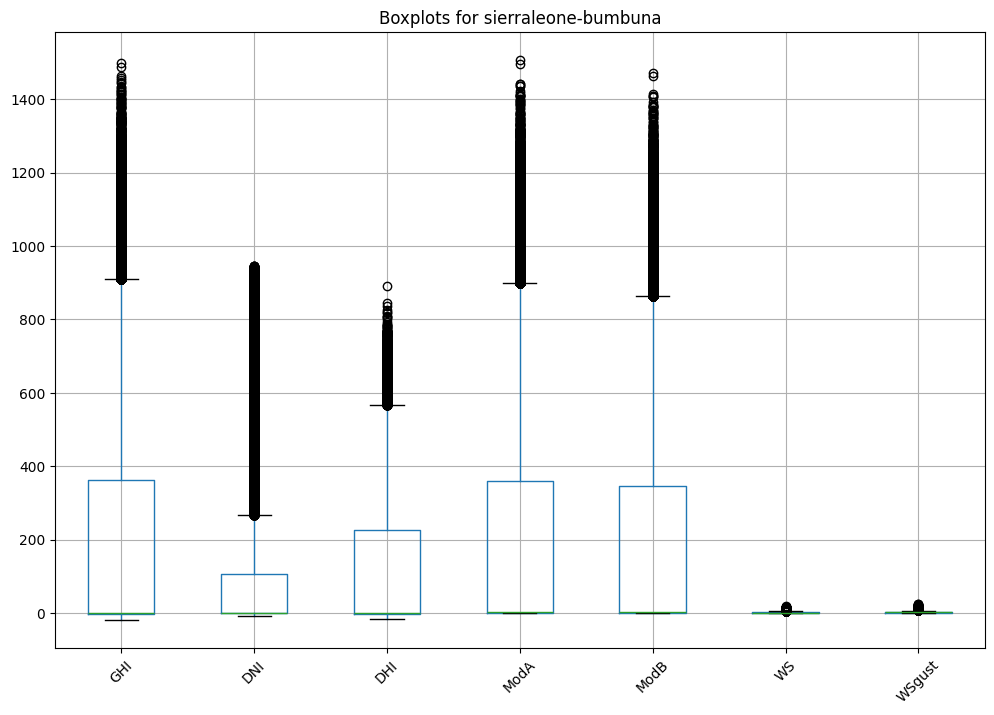

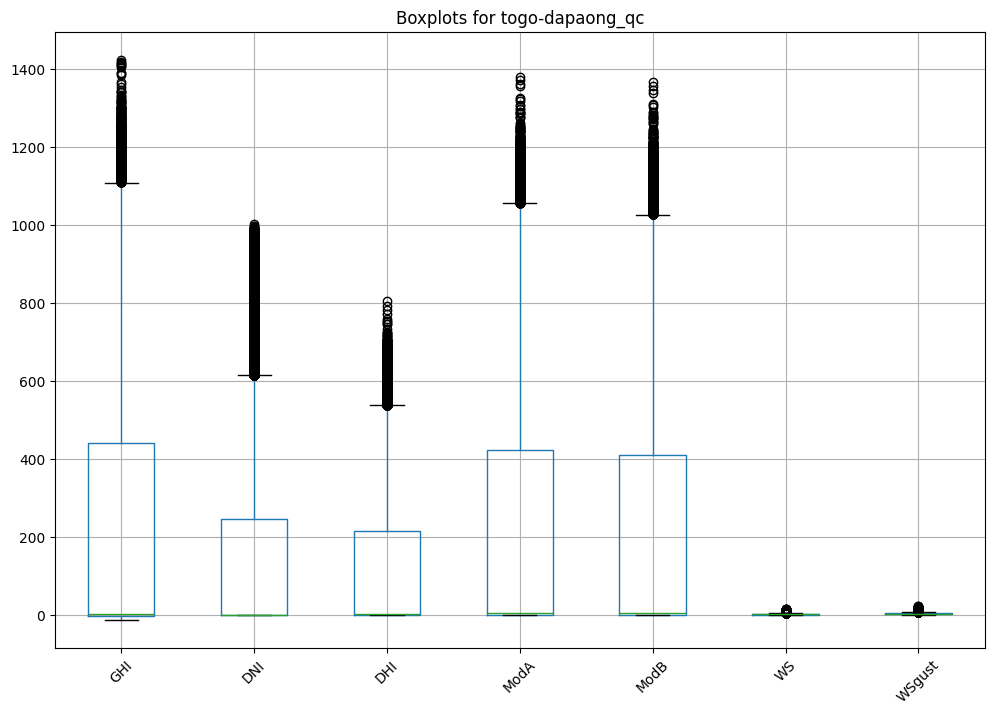

In [20]:
plot_boxplots_for_outliers_checking(df1,coulumns_to_check,'benin-malanville')
plot_boxplots_for_outliers_checking(df2,coulumns_to_check,'sierraleone-bumbuna')
plot_boxplots_for_outliers_checking(df3,coulumns_to_check,'togo-dapaong_qc')


In [36]:
# Step 3: Identify Incorrect Entries
def check_incorrect_entries(df, columns, dataset_name):
    incorrect_entries = {}
    for column in columns:
        incorrect = df[df[column] < 0]
        if not incorrect.empty:
            incorrect_entries[column] = incorrect[column]
    
    if incorrect_entries:
        print(f"Incorrect Entries in {dataset_name}:")
        for column, data in incorrect_entries.items():
            print(f"\nColumn: {column}\n{data}\n")
    else:
        print(f"No incorrect entries found in {dataset_name}.\n")

In [37]:
check_incorrect_entries(df1,coulumns_to_check,'benin-malanville')
check_incorrect_entries(df2,coulumns_to_check,'sierraleone-bumbuna')
check_incorrect_entries(df3,coulumns_to_check,'togo-dapaong_qc')


Incorrect Entries in benin-malanville:

Column: GHI
0        -1.2
1        -1.1
2        -1.1
3        -1.1
4        -1.0
         ... 
525595   -5.5
525596   -5.5
525597   -5.5
525598   -5.5
525599   -5.5
Name: GHI, Length: 258847, dtype: float64


Column: DNI
0        -0.2
1        -0.2
2        -0.2
3        -0.1
4        -0.1
         ... 
525595   -0.1
525596   -0.1
525597   -0.1
525598   -0.1
525599   -0.1
Name: DNI, Length: 275987, dtype: float64


Column: DHI
0        -1.1
1        -1.1
2        -1.1
3        -1.0
4        -1.0
         ... 
525595   -5.9
525596   -5.8
525597   -5.8
525598   -5.8
525599   -5.7
Name: DHI, Length: 259182, dtype: float64

Incorrect Entries in sierraleone-bumbuna:

Column: GHI
0        -0.7
1        -0.7
2        -0.7
3        -0.7
4        -0.7
         ... 
525595   -1.6
525596   -1.7
525597   -1.7
525598   -1.7
525599   -1.7
Name: GHI, Length: 261135, dtype: float64


Column: DNI
0        -0.1
1        -0.1
2        -0.1
4        -0.1
5        -

In [38]:
# Time Series Analysis: Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 


In [44]:
# step 1 proper data rime handling

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df2['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df3['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1.set_index('Timestamp' , inplace=True)
df2.set_index('Timestamp' , inplace=True)
df3.set_index('Timestamp' , inplace=True)

In [46]:
# Plotting Time Series Data
# 1. Line Graphs
import matplotlib.pyplot as plt

# Defining a function to plot line graphs for the specified columns
def plot_time_series(data , columns , data_set_name):
    plt.figure(figsize=(14,8))
    for column in columns:
        plt.plot(data.index, data[column], label=column)
    plt.title(f"Time series of {', '.join(columns)} in {data_set_name}")
    plt.xlabel('Time')
    plt.ylabel('values')
    plt.legend()
    plt.show()




In [47]:
# Columns of interest
time_series_columns = ['GHI', 'DNI', 'DHI', 'Tamb']

c:\Users\bekib\Desktop\10ACADAMY\week-0\.week-0\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


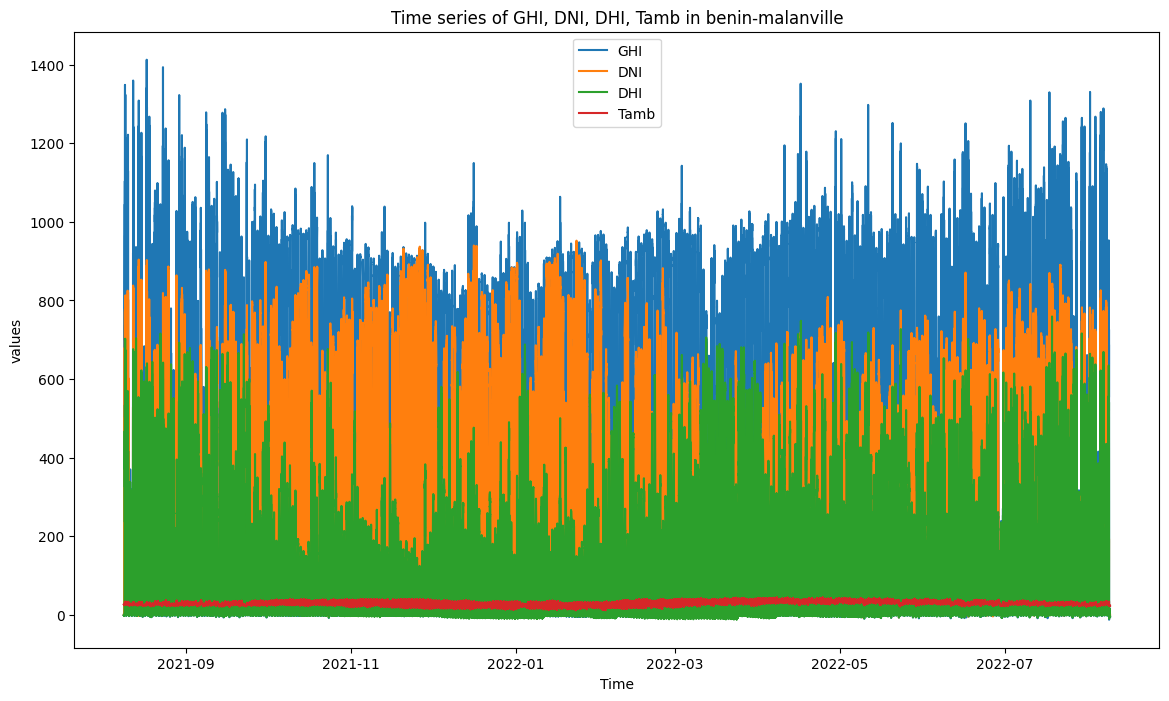

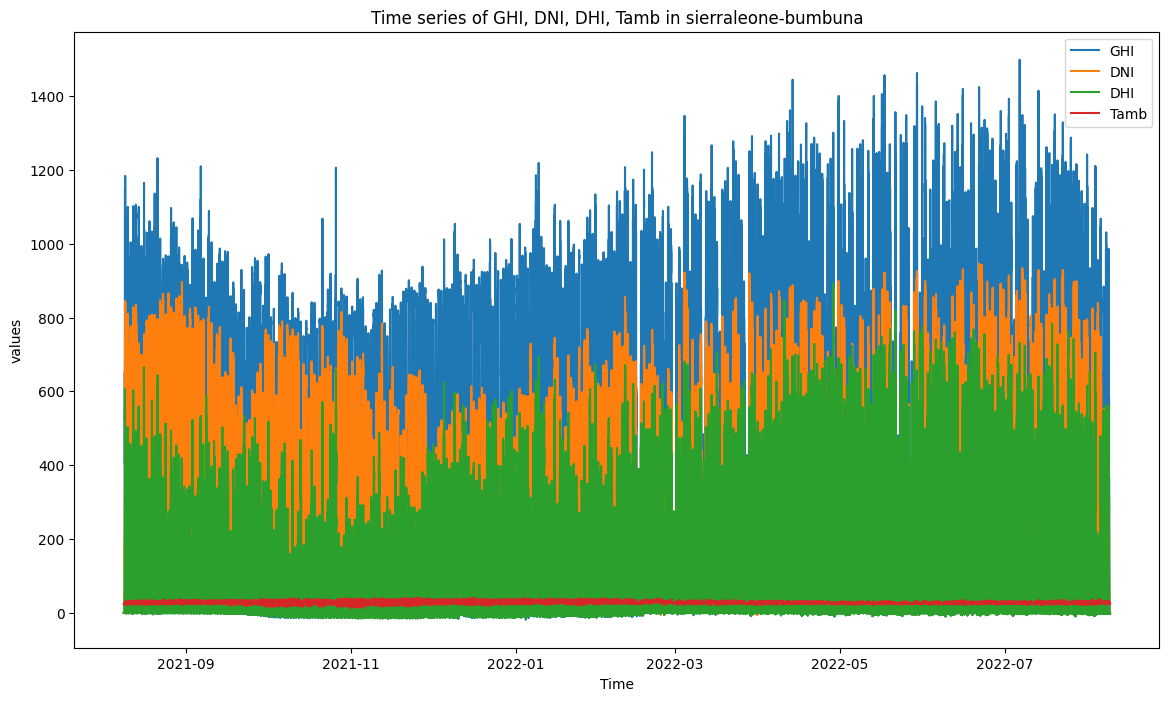

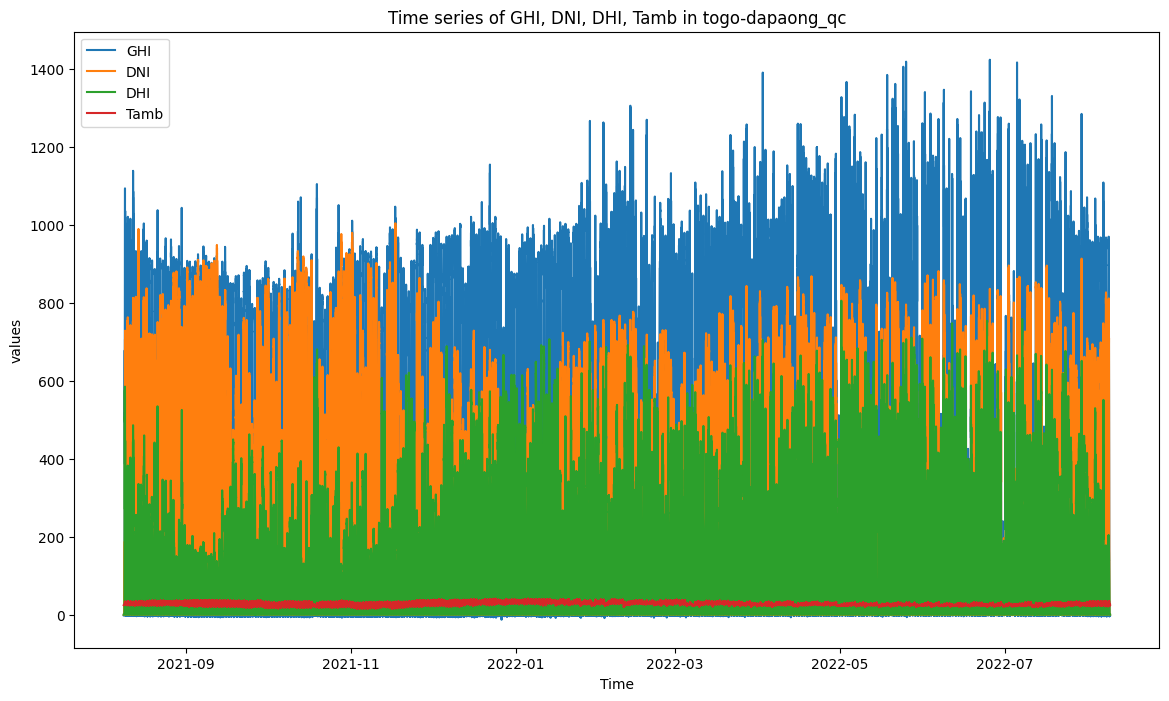

In [48]:
plot_time_series(df1,time_series_columns,'benin-malanville')
plot_time_series(df2,time_series_columns,'sierraleone-bumbuna')
plot_time_series(df3,time_series_columns,'togo-dapaong_qc')


In [49]:
# Area Plots
def plot_area_series(data , columns, data_set_name):
    plt.figure(figsize=(14,8))
    data[columns].plot(kind='area',stacked=False, alpha=0.5)
    plt.title(f"Area Plot of {', '.join(columns)} in {data_set_name}")
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.show()

<Figure size 1400x800 with 0 Axes>

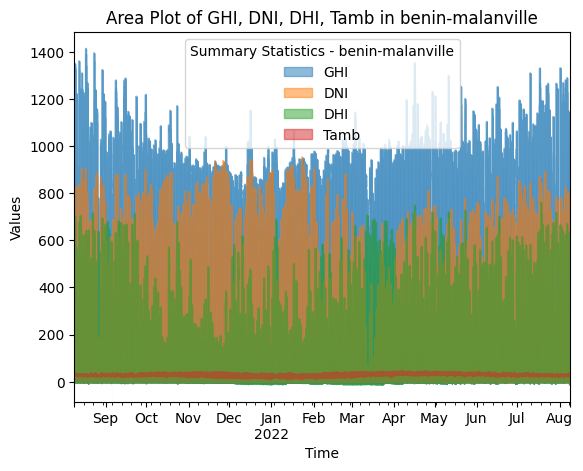

<Figure size 1400x800 with 0 Axes>

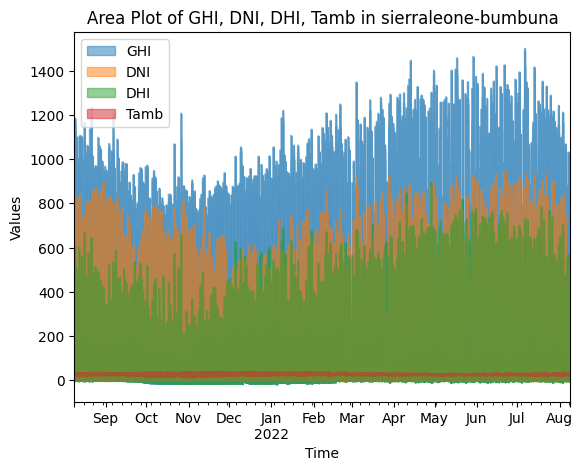

<Figure size 1400x800 with 0 Axes>

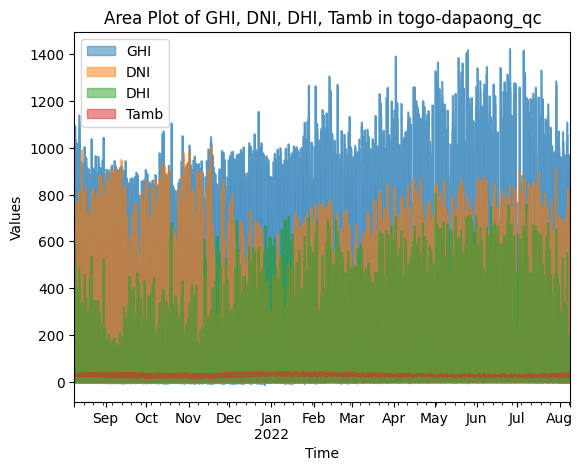

In [50]:
plot_area_series(df1,time_series_columns,'benin-malanville')
plot_area_series(df2,time_series_columns,'sierraleone-bumbuna')
plot_area_series(df3,time_series_columns,'togo-dapaong_qc')


In [51]:
# Step 3: Grouping and Aggregating by Time Intervals
# Group by month and plot
def plot_monthly_trends(df, columns, dataset_name):
    monthly_df = df[columns].resample('M').mean()
    plt.figure(figsize=(14, 8))
    monthly_df.plot(kind='line')
    plt.title(f"Monthly Trends of {', '.join(columns)} in {dataset_name}")
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.show()
    

C:\Users\bekib\AppData\Local\Temp\ipykernel_103228\710390102.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df[columns].resample('M').mean()


<Figure size 1400x800 with 0 Axes>

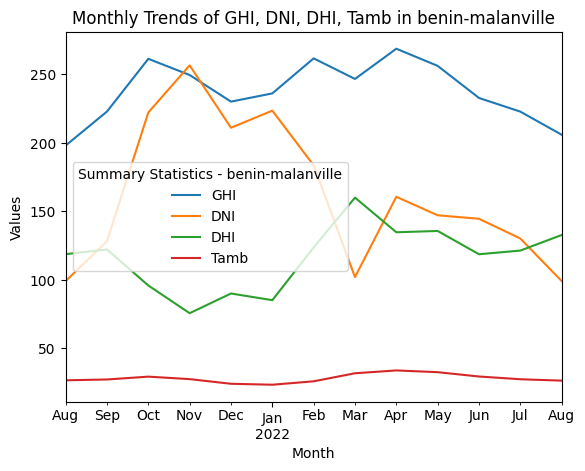

C:\Users\bekib\AppData\Local\Temp\ipykernel_103228\710390102.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df[columns].resample('M').mean()


<Figure size 1400x800 with 0 Axes>

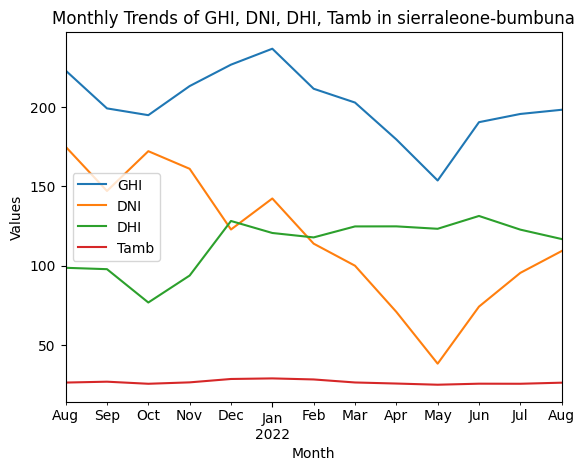

C:\Users\bekib\AppData\Local\Temp\ipykernel_103228\710390102.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df[columns].resample('M').mean()


<Figure size 1400x800 with 0 Axes>

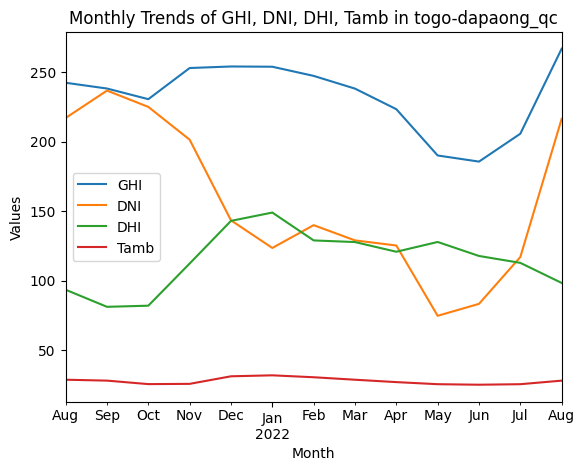

In [52]:
plot_monthly_trends(df1,time_series_columns,'benin-malanville')
plot_monthly_trends(df2,time_series_columns,'sierraleone-bumbuna')
plot_monthly_trends(df3,time_series_columns,'togo-dapaong_qc')


In [53]:
# Step 4: Detecting Anomalies
def plot_with_rolling_mean(df, columns, dataset_name):
    plt.figure(figsize=(14, 8))
    for column in columns:
        plt.plot(df.index, df[column], label=f'{column} Original')
        plt.plot(df.index, df[column].rolling(window=24).mean(), label=f'{column} Rolling Mean')
    plt.title(f"Time Series with Rolling Mean for {dataset_name}")
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

c:\Users\bekib\Desktop\10ACADAMY\week-0\.week-0\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


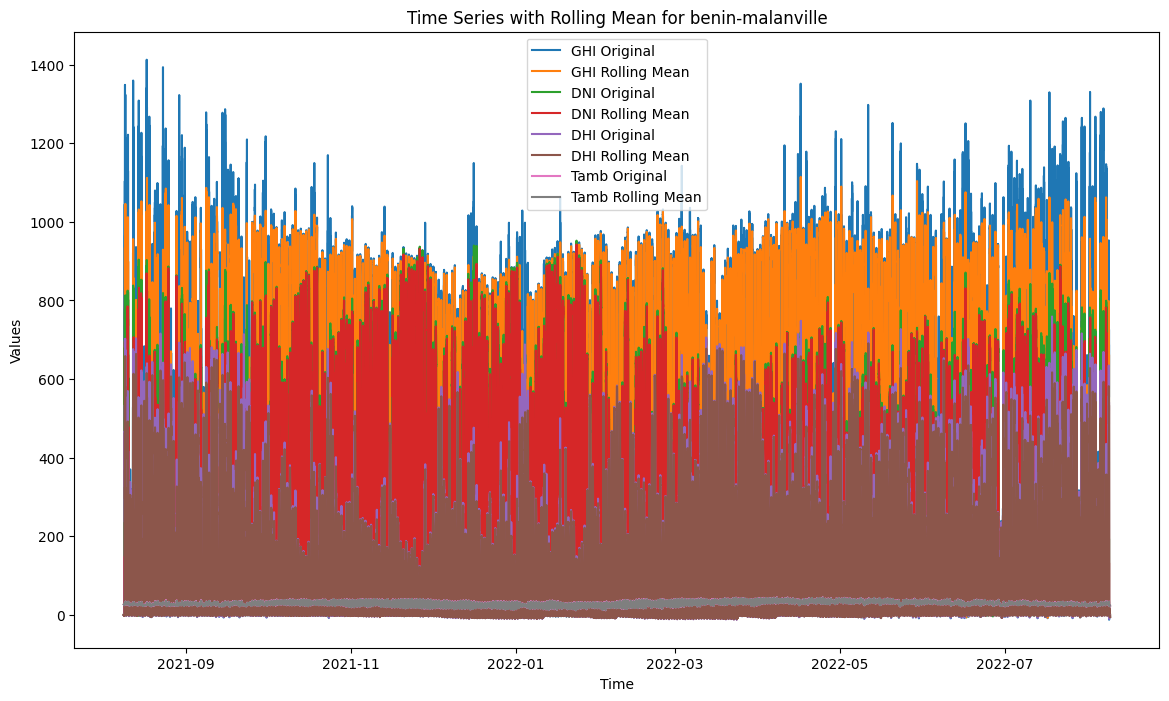

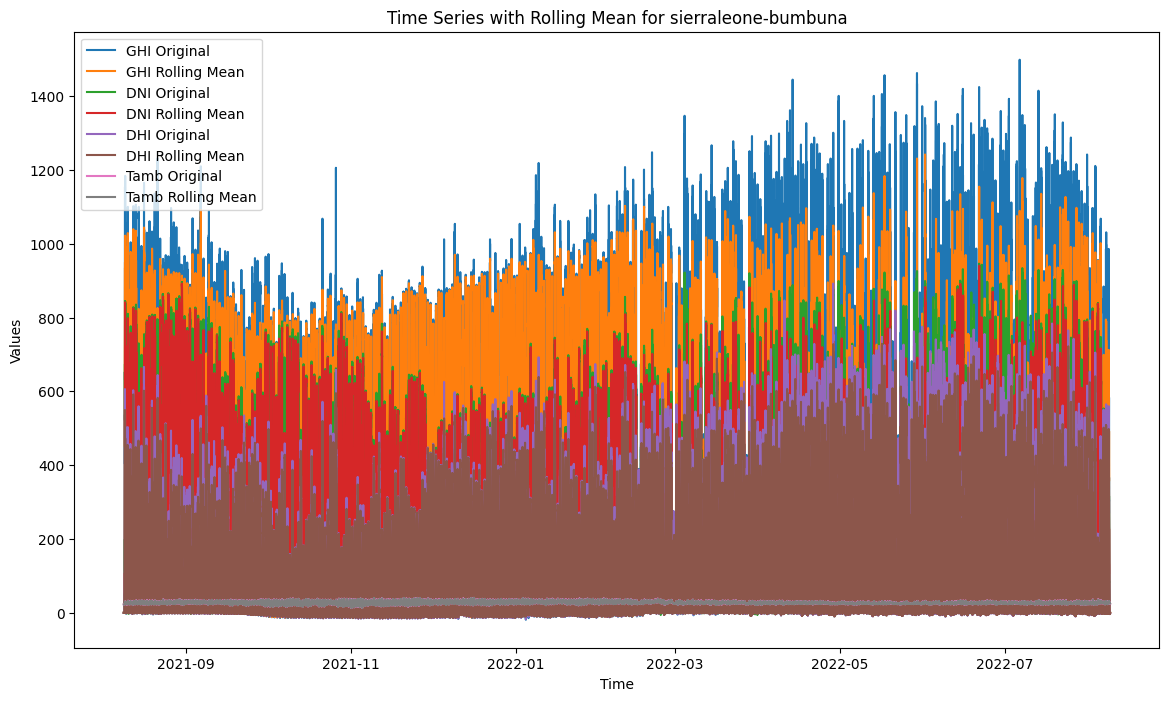

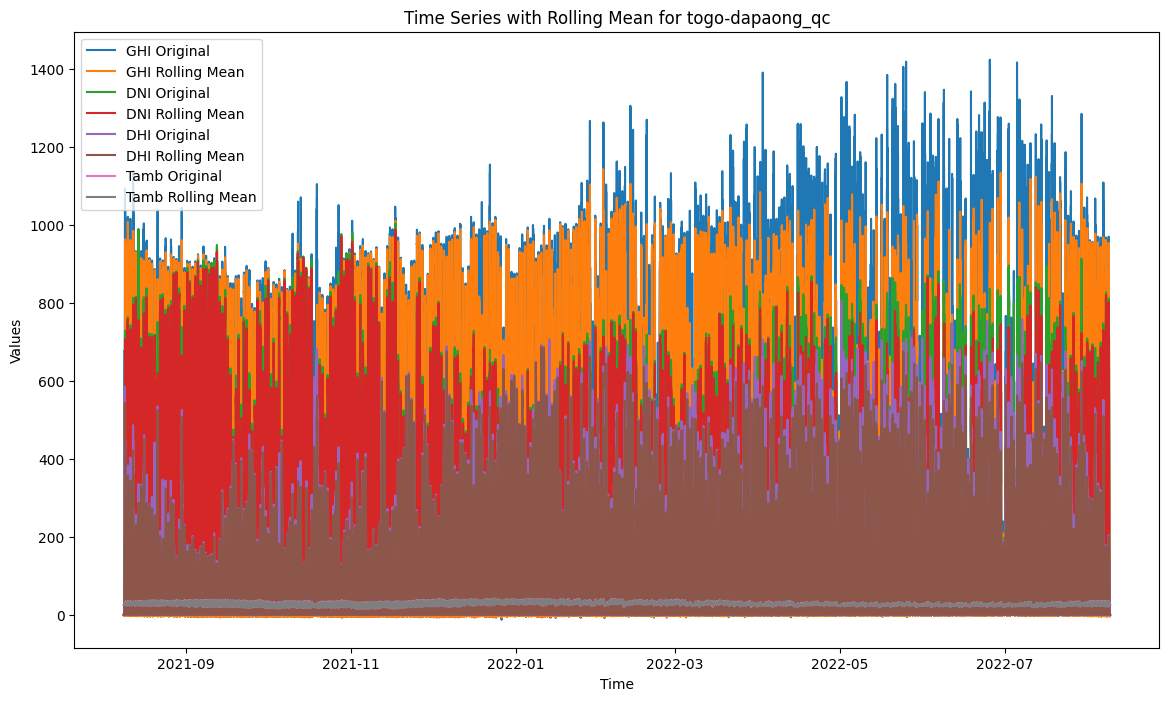

In [54]:
plot_with_rolling_mean(df1,time_series_columns,'benin-malanville')
plot_with_rolling_mean(df2,time_series_columns,'sierraleone-bumbuna')
plot_with_rolling_mean(df3,time_series_columns,'togo-dapaong_qc')


In [59]:
# Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

# Step 1: Explore the Cleaning Column

def check_the_unique_value_in_the_cleaning_column(data,data_set_name):
    print(data['Cleaning'].unique())

In [60]:
check_the_unique_value_in_the_cleaning_column(df1,'benin-malanville')
check_the_unique_value_in_the_cleaning_column(df2,'sierraleone-bumbuna')
check_the_unique_value_in_the_cleaning_column(df3,'togo-dapaong_qc')


[0 1]
[0 1]
[0 1]


In [65]:
# Step 2: Segment the Data
def segmetnig_the_data(data , data_set_name):
    before_cleaning = data[data['Cleaning'] == 0]
    after_cleaning = data[data['Cleaning'] == 1]

    # calculate the mean sensor reading before and after cleaning
    mean_before_cleaning = before_cleaning[['ModA','ModB']].mean()
    mean_after_cleaning = after_cleaning[['ModA','ModB']].mean()

    print(f"mean sensor Reading Before Cleaning for {data_set_name} dataset is :")
    print(mean_before_cleaning)
    print(f"mean sensor Reading After Cleaning for {data_set_name} dataset is :")
    print(mean_after_cleaning)
    

In [66]:
segmetnig_the_data(df1,'benin-malanville')
segmetnig_the_data(df2,'sierraleone-bumbuna')
segmetnig_the_data(df3,'togo-dapaong_qc')


mean sensor Reading Before Cleaning for benin-malanville dataset is :
Summary Statistics - benin-malanville
ModA    236.524253
ModB    228.816071
dtype: float64
mean sensor Reading After Cleaning for benin-malanville dataset is :
Summary Statistics - benin-malanville
ModA    307.229278
ModB    301.972165
dtype: float64
mean sensor Reading Before Cleaning for sierraleone-bumbuna dataset is :
ModA    206.578599
ModB    198.038150
dtype: float64
mean sensor Reading After Cleaning for sierraleone-bumbuna dataset is :
ModA    273.309252
ModB    277.231102
dtype: float64
mean sensor Reading Before Cleaning for togo-dapaong_qc dataset is :
ModA    225.979064
ModB    219.401351
dtype: float64
mean sensor Reading After Cleaning for togo-dapaong_qc dataset is :
ModA    535.186477
ModB    532.211744
dtype: float64


In [67]:
# visualizing the impact
def visualize_the_impact(data,data_set_name):
    print(f'the visual for {data_set_name} data set')
    plt.figure(figsize=(14,8))

    # Plot ModA and ModB with color coding for cleaning
    plt.plot(data.index, data['ModA'], label='ModA' ,  color='blue', alpha=0.6)
    plt.plot(data.index, data['ModB'], label='ModB' ,  color='orange', alpha=0.6)
    
    # highlight the cleaning periods
    cleaning_times = data[data['Cleaning']==1].index
    for clean_time in cleaning_times:
        plt.axvline(x=clean_time, color='red', linestyle='--', alpha=0.3)
    
    plt.title("Sensor Readings Over Time with Cleaning Events")
    plt.xlabel("Time")
    plt.ylabel("Sensor Readings")
    plt.legend()
    plt.show()   

In [69]:
visualize_the_impact(df1,'benin-malanville')
visualize_the_impact(df2,'sierraleone-bumbuna')
visualize_the_impact(df3,'togo-dapaong_qc')

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [70]:
# 4 Time Series Analysis Before and After Cleaning
# Define a function to plot before and after cleaning for a specific event
def plot_before_after_cleaning(df, sensor_columns, cleaning_time, time_window='1D'):
    start_time = cleaning_time - pd.Timedelta(time_window)
    end_time = cleaning_time + pd.Timedelta(time_window)
    
    df_segment = df[start_time:end_time]
    
    plt.figure(figsize=(14, 8))
    for sensor in sensor_columns:
        plt.plot(df_segment.index, df_segment[sensor], label=sensor)
    
    plt.axvline(x=cleaning_time, color='red', linestyle='--', label='Cleaning Time')
    plt.title(f"Sensor Readings Before and After Cleaning at {cleaning_time}")
    plt.xlabel("Time")
    plt.ylabel("Sensor Readings")
    plt.legend()
    plt.show()



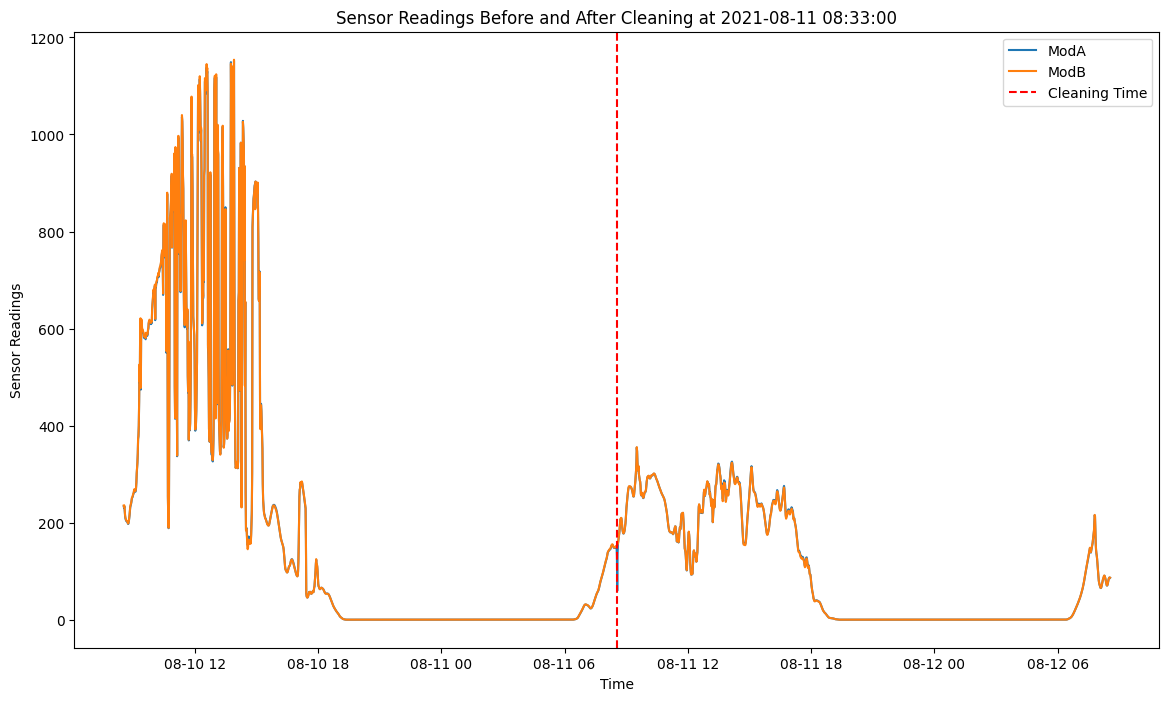

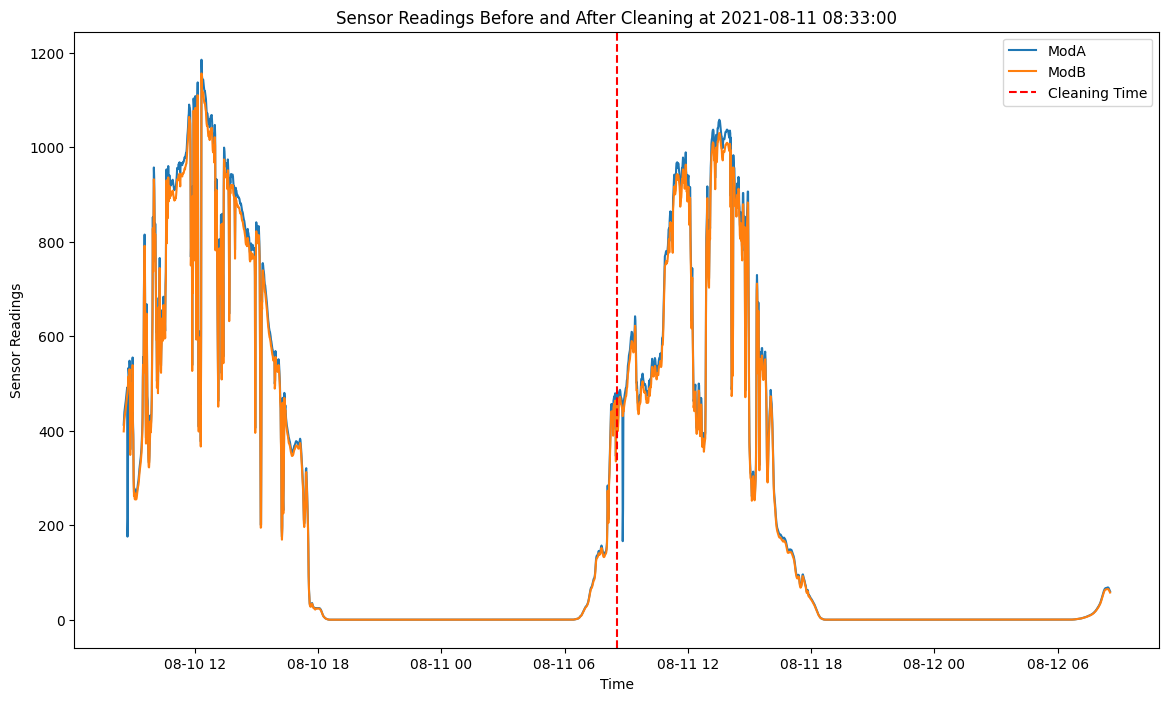

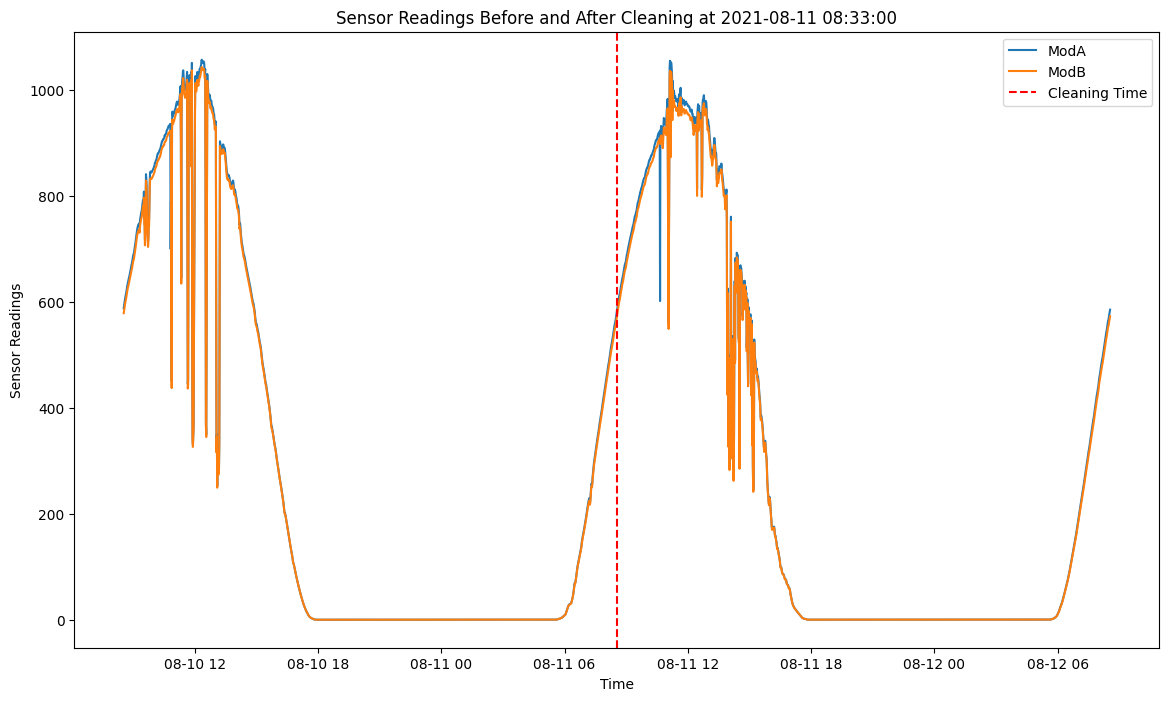

In [71]:
# Plot before and after cleaning for a specific event
specific_cleaning_time = df1[df1['Cleaning'] == 1].index[0]  # Example: first cleaning event
plot_before_after_cleaning(df1, ['ModA', 'ModB'], specific_cleaning_time, time_window='1D')
plot_before_after_cleaning(df2, ['ModA', 'ModB'], specific_cleaning_time, time_window='1D')
plot_before_after_cleaning(df3, ['ModA', 'ModB'], specific_cleaning_time, time_window='1D')
